In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('diabetesdata.csv')
data=pd.DataFrame(data)
data.head()

,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age,IsDiabetic
0,6,148.0,72,0,33.6,0.627,50.0,1
1,1,NaN,66,0,26.6,0.351,31.0,0
2,8,183.0,64,0,23.3,0.672,NaN,1
3,1,NaN,66,94,28.1,0.167,21.0,0
4,0,137.0,40,168,43.1,2.288,33.0,1


In [3]:
x=data.iloc[:,0:7]
y=data['IsDiabetic']

# defining keras model

In [66]:
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense,Activation,Convolution2D,MaxPooling2D, Dropout, Activation, Flatten
np.random.seed(10)

In [69]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


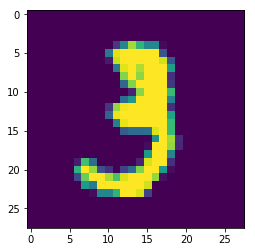

In [54]:
plt.imshow(X_train[10])
plt.show()

In [70]:
# reshaping to the form n,depth,width,height from n,w,h

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train.shape

(60000, 1, 28, 28)

In [71]:
Y_train.shape #we have a long array instead of different classes of numbers. so we transform array into classes
from keras.utils import np_utils   #converts vector to matrix
Y_train=np_utils.to_categorical(Y_train,10)
Y_test=np_utils.to_categorical(Y_test,10)
Y_train.shape

(60000, 10)

In [73]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')
xtrain /= 255
xtest /= 255
model=Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = model.evaluate(X_test, Y_test, verbose=0)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(1, 28, 28...)`
  import sys


ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv2d_7/convolution' (op: 'Conv2D') with input shapes: [?,1,28,28], [3,3,28,32].

In [20]:
model=Sequential()   #sequential model type
model.add(Dense(12,input_dim=7,activation='relu'))  #defining 3 NN layers, no. of neurons is hit and trial
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
sgd = optimizers.SGD(lr=0.01, clipnorm=1.)
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])

batc_size = no. of smaples model takes again and again to train the NN;
epochs = how many times you go through your training set
each time after a batvh is processed the model is updated, so in an apoch the model can be updated multiple times

In [21]:
model.fit(x,y,epochs=100,batch_size=25)   

Epoch 1/100
768/768 [==============================] - 1s 1ms/step - loss: nan - acc: 0.0143
Epoch 2/100
768/768 [==============================] - 0s 244us/step - loss: nan - acc: 0.0000e+00
Epoch 3/100
768/768 [==============================] - 0s 210us/step - loss: nan - acc: 0.0000e+00
Epoch 4/100
768/768 [==============================] - 0s 203us/step - loss: nan - acc: 0.0000e+00
Epoch 5/100
768/768 [==============================] - 0s 208us/step - loss: nan - acc: 0.0000e+00
Epoch 6/100
768/768 [==============================] - 0s 219us/step - loss: nan - acc: 0.0000e+00
Epoch 7/100
768/768 [==============================] - 0s 260us/step - loss: nan - acc: 0.0000e+00
Epoch 8/100
768/768 [==============================] - 0s 221us/step - loss: nan - acc: 0.0000e+00
Epoch 9/100
768/768 [==============================] - 0s 242us/step - loss: nan - acc: 0.0000e+00
Epoch 10/100
768/768 [==============================] - 0s 198us/step - loss: nan - acc: 0.0000e+00
Epoch 11/100
76

768/768 [==============================] - 0s 73us/step - loss: nan - acc: 0.0000e+00
Epoch 84/100
768/768 [==============================] - 0s 68us/step - loss: nan - acc: 0.0000e+00
Epoch 85/100
768/768 [==============================] - 0s 58us/step - loss: nan - acc: 0.0000e+00
Epoch 86/100
768/768 [==============================] - 0s 76us/step - loss: nan - acc: 0.0000e+00
Epoch 87/100
768/768 [==============================] - 0s 55us/step - loss: nan - acc: 0.0000e+00
Epoch 88/100
768/768 [==============================] - 0s 73us/step - loss: nan - acc: 0.0000e+00
Epoch 89/100
768/768 [==============================] - 0s 68us/step - loss: nan - acc: 0.0000e+00
Epoch 90/100
768/768 [==============================] - 0s 63us/step - loss: nan - acc: 0.0000e+00
Epoch 91/100
768/768 [==============================] - 0s 68us/step - loss: nan - acc: 0.0000e+00
Epoch 92/100
768/768 [==============================] - 0s 68us/step - loss: nan - acc: 0.0000e+00
Epoch 93/100
768/768 [=

In [14]:
score=model.evaluate(x,y)
print(model.metrics_names[1], score[1]*100)

768/768 [==============================] - 0s 349us/step
acc 0.0


In [15]:
pred = model.predict(x)
rounded = [round(x[0]) for x in pred]
print(rounded)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,